In [65]:
import numpy
import pandas
from google.colab import drive 
drive.mount('/content/drive', force_remount = True)
!ls "/content/drive/My Drive"
data_frame = pandas.read_excel('/content/drive/MyDrive/Colab Notebooks/Booking fly.xlsx')

Mounted at /content/drive
'2022.05.24 Danh sách CTV GT cụm Bill Gates - Hoàng Mai.xlsx'
'Bai 1_Khai thac CSDL.xlsx'
'Colab Notebooks'
 InforeTech_EntryTest
'IOT - 132667 - 20212'
'Ngoc Lan Vu - CV Data Analyst Intern (1).pdf'
'Ngoc Lan Vu - CV Data Analyst Intern (2).pdf'
'Ngoc Lan Vu - CV Data Analyst Intern (3).pdf'
'Ngoc Lan Vu - CV Data Analyst Intern.pdf'
'Project III - Vũ Thị Ngọc Lan - 20183939'
'Secret Confession.gform'
'Slide Capstone Project - TKXDPM - 20211-converted.pptx'
'Slide Capstone Project - TKXDPM - 20211.zip'
 supermarket_sales.csv
 us_youtube_trending.xlsx


In [66]:
print(data_frame['income'].agg('mean'))

13859.62


Thu nhập trung bình của khách hàng = 13859.62

In [67]:
from scipy import stats
print(data_frame['income'].agg('mode'))

0    12300
dtype: int64


Mode của thu nhập khách hàng là 12300 

In [68]:
print(data_frame['income'].agg('median'))

11520.0


Trung vị của thu nhập khách hàng là 11520

In [69]:
print(data_frame.groupby('area').agg({"income" : [numpy.mean]}))

                income
                  mean
area                  
central   19586.096618
northern  10750.421622
southern   8209.814815


Thu nhập trung bình từng khu vực:

1. central   19586.096618
2. northern  10750.421622
3. southern   8209.814815

In [70]:
print(data_frame.query('gender == "male" and job == "sale"').agg({"year_of_school" :[numpy.mean]}))

      year_of_school
mean       13.922414


Số năm đi học trung  bình của khách hàng là nam và là nhân viên kĩ thuật là: 13.922414

In [71]:
print(data_frame.query('gender == "female" and area in ("central", "southern")').agg({"age" :[numpy.mean]}))

            age
mean  56.096296


Tuổi trung bình của khách hàng nữ sống ở miền Trung và Nam: 56.096296

In [72]:
print(data_frame.sort_values('age').head(int(len(data_frame)*30/100)).agg({"age" :[numpy.mean]}))

            age
mean  43.486667


 Tuổi trung bình cho 30% khách hàng có tuổi thấp nhất là: 43.486667

In [73]:
print(data_frame.sort_values('age').head(int(len(data_frame)*20/100)).agg({"income" :[numpy.mean]}))

      income
mean  9848.3


Thu nhập trung bình cho 20% khách hàng có tuổi thấp nhất là: 9848.3

In [74]:
print(data_frame.sort_values('income', ascending= False).head(int(len(data_frame)*10/100)).agg({"year_of_school" :[numpy.mean]}))

      year_of_school
mean           17.94


Số năm đi học trung bình của 10% khách hàng có thu nhập cao nhất: 17.94

In [75]:
df = data_frame.groupby('degree')['Code'].count().reset_index()
df['percentage'] = 100 * df['Code']  / df['Code'].sum()
print(df)

      degree  Code  percentage
0   bachelor   129        25.8
1  highshool   257        51.4
2     master   114        22.8


Thống kê số lượng khách hàng, tỷ trọng theo từng trình độ
1. bachelor - 129 - 25.8
2. highshool - 257 - 51.4
3. master - 114 - 22.8

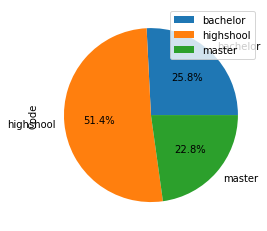

In [76]:
df.plot(kind='pie', y='Code',labels = df['degree'], autopct='%1.1f%%')

In [77]:
df1 = data_frame.groupby(['age_group','gender'])['Code'].count().reset_index()
df1['percentage'] = 100 * df1['Code']  / df1['Code'].sum()
print(df1)
df2 = data_frame.groupby(['age_group'])['Code'].count().reset_index()
df2['percentage'] = 100 * df2['Code']  / df2['Code'].sum()
age_count = df2['Code'].values.tolist()
print(age_count)
print(df2)

  age_group  gender  Code  percentage
0     elder  female    84        16.8
1     elder    male    15         3.0
2    middle  female   116        23.2
3    middle    male   237        47.4
4     youth  female    29         5.8
5     youth    male    19         3.8
[99, 353, 48]
  age_group  Code  percentage
0     elder    99        19.8
1    middle   353        70.6
2     youth    48         9.6


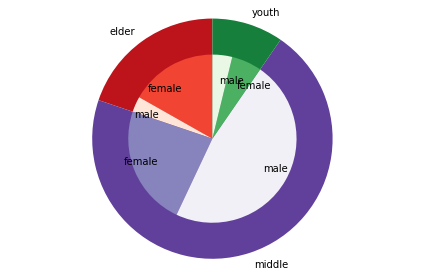

In [78]:
import matplotlib.pyplot as plt
age_group = df1.drop_duplicates(['age_group'])['age_group'].values.tolist()
gender_percentage = df1['percentage'].values.tolist()
gender_label = df1['gender'].values.tolist()
code = df1['Code'].values.tolist()
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Purples
cmap3 = plt.cm.Greens

outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8)]
inner_colors = [*cmap1(numpy.linspace(.6, .1, 2)),
                *cmap2(numpy.linspace(.6, .1, 2)),
                *cmap3(numpy.linspace(.6, .1, 2))]
bigger = plt.pie(age_count, labels= age_group, colors=outer_colors,
                 startangle=90, frame=True)
smaller = plt.pie(gender_percentage, labels=gender_label,
                  colors=inner_colors, radius=0.7,
                  startangle=90, labeldistance=0.7)
plt.axis('equal')
plt.tight_layout()

plt.show()